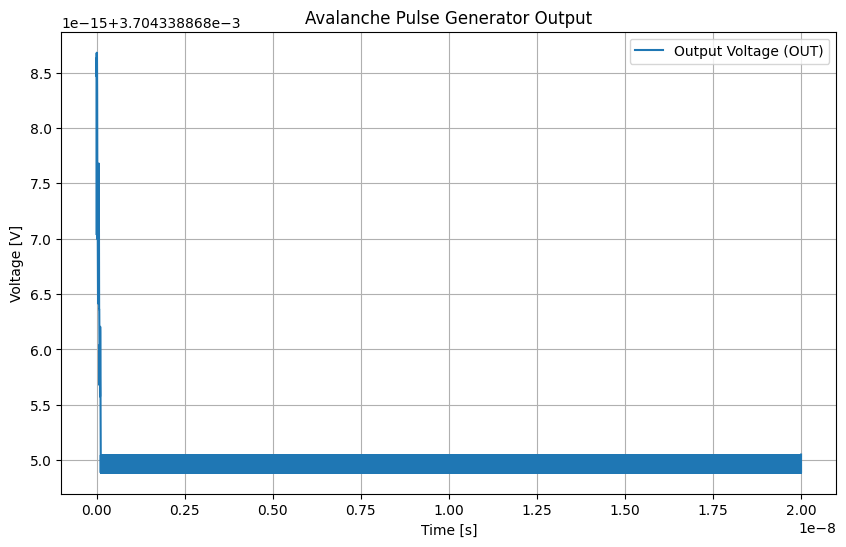

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import PySpice.Logging.Logging as Logging
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

logger = Logging.setup_logging()

# -------------------------------------------------------------
# Define circuit
# -------------------------------------------------------------
circuit = Circuit("Avalanche Pulse Generator")

# High-voltage DC supply (instead of boost converter for simplicity)
circuit.V("HV", "HV", circuit.gnd, 90@u_V)

# Bias resistor
circuit.R("bias", "HV", "B", 1@u_MΩ)

# Small capacitor at transistor collector node
circuit.C("1", "B", "OUT", 2@u_pF)

# Transistor + load
# Use a simple NPN with breakdown parameters instead of undefined model
circuit.model("Q1mod", "NPN", bf=100, is_=1e-14, vaf=100,
              ikf=0.1, ise=1e-13, ne=1.5, br=1,
              rc=1, cje=2e-12, vje=0.75, cjc=1e-12, vjc=0.75,
              bvceo=90, ibv=0.001)

circuit.Q("1", "OUT", "B", circuit.gnd, model="Q1mod")

# Output load 50Ω
circuit.R("L", "OUT", circuit.gnd, 50@u_Ohm)

# -------------------------------------------------------------
# Simulation
# -------------------------------------------------------------
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2@u_ps, end_time=20@u_ns)

# -------------------------------------------------------------
# Plot results
# -------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(analysis.time, analysis.out, label="Output Voltage (OUT)")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Avalanche Pulse Generator Output")
plt.grid(True)
plt.legend()
plt.show()
